In [1]:
import pandas as pd
import numpy as np
import itertools

from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import category_encoders as ce
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('bank.csv', delimiter = ';')
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [3]:
## 1) Perform Exploratory Data Analysis (EDA)
# Task 1.1: Check dimension of dataset
print("Bank data set dimensions : {}".format(df.shape))
print(df.dtypes)


Bank data set dimensions : (4521, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [4]:
#Task 1.2:
# a) Check for missing/Null Data points
print(df.isnull().sum())
print('\n--------------\n')
print(df.isna().sum())
# b) Check for duplicates
print(df[df.duplicated(keep=False)])


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

--------------

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [5]:
# Task 1.3: show summary statistics
print(df.describe())

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


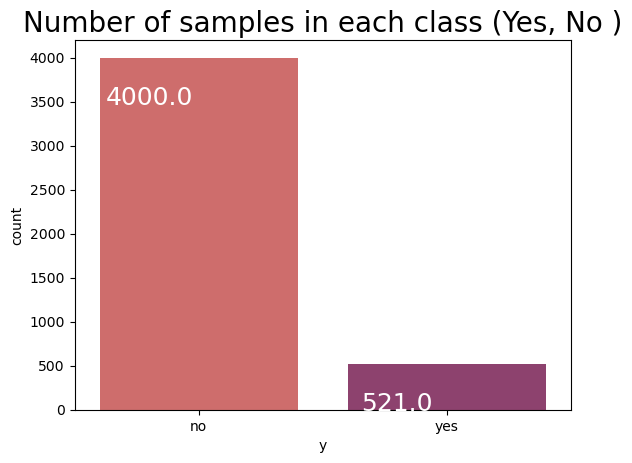

In [6]:
# Task 1.4: counting values of variables in 'diagnosis'
ax = sns.countplot(x="y", data=df, palette="flare")
ax.set_title('Number of samples in each class (Yes, No )', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [7]:
## 2) Data pre-processing

In [8]:
#2.1 Handling Target Categorical Value via Encoding
labelencoder_y = LabelEncoder()
df['y'] = labelencoder_y.fit_transform(df['y'])


In [9]:

for col in df.columns[df.dtypes == 'object']:
    if col != 'y':  # Assuming 'y' is the target variable
        df[col] = LabelEncoder().fit_transform(df[col])
        
        
        
# Task 2.2: Set the input (X) and output/target (y) 
X = df.iloc[:, 1:16]
y = df.iloc[:, 16]

# Task 2.3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)


In [10]:
#

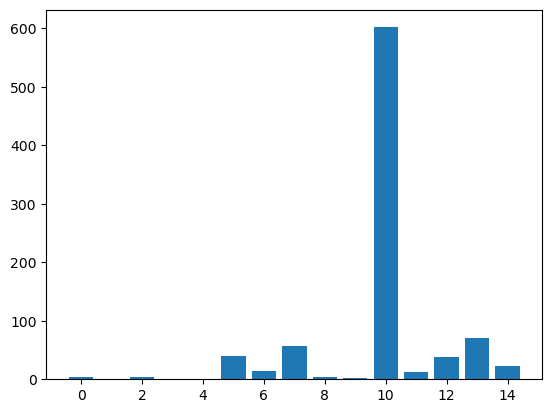

        Score Feature Name
0  601.815465     duration
1   70.061518     previous
2   57.439236      contact
3   40.320214      housing
4   37.537236        pdays
5   22.809634     poutcome
6   14.512146         loan
7   13.141424     campaign
8    4.683322    education
9    4.511153          job

Top 5 features:



,Score,Feature Name
0,601.815465,duration
1,70.061518,previous
2,57.439236,contact
3,40.320214,housing
4,37.537236,pdays


In [11]:

# Ranking of all features based on ANOVA F-scores

fs = SelectKBest(score_func=f_classif, k=15) 
fs.fit(X_train,y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

# collecting feature scores
features_scores = [(i, score) for i, score in enumerate(fs.scores_)]
# creating a DataFrame from the collected scores
fs_score_df = pd.DataFrame(features_scores, columns=['Feature Number','Score'])
# Adding feature names from BC_df assungming BC_df has all features including the target in the first column
fs_score_df['Feature Name'] = df.columns[1:16]
# Plotting the scores
plt.bar(fs_score_df['Feature Number'], fs_score_df['Score'])
plt.show()

#Sorting the DataFrame by score in descending order
fs_score_df = fs_score_df.sort_values(by=['Score'], ascending=False).reset_index(drop=True)
print(fs_score_df[['Score','Feature Name']].head(10))

#choosing the top 5 features
chosen_features = fs_score_df[['Score','Feature Name']].head(5)
print("\nTop 5 features:\n")
chosen_features


In [12]:
#P_value calculation

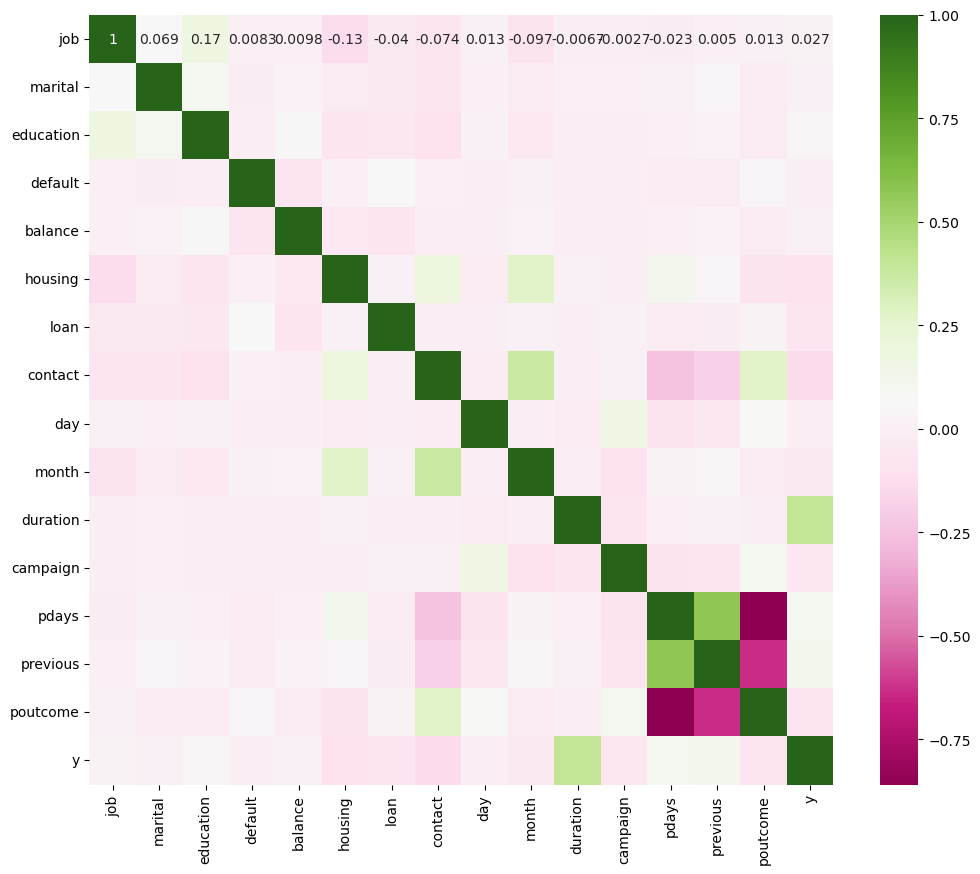

In [13]:
# Task 4: Explore the correlation between features
A = pd.concat([X,y], axis=1)
plt.figure(figsize=(12,10))  # Set the size of figure to 12 by 10.
p=sns.heatmap(A.corr(), annot=True,cmap ='PiYG') 

In [14]:
predictors = df[['duration', 'contact', 'previous', 'housing', 'pdays']]

In [15]:
# Scale features
sc_X = StandardScaler()

X_sca =  pd.DataFrame(sc_X.fit_transform(predictors),
        columns=predictors.columns.unique())

In [16]:
# Split the dataset with top 5 features
X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size=0.3, random_state=42, stratify = y)

In [17]:
# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Training the model
gnb.fit(X_train, y_train)

# Predicting the labels
gnb_tar_pred = gnb.predict(X_test)


Text(50.722222222222214, 0.5, 'True Labels')

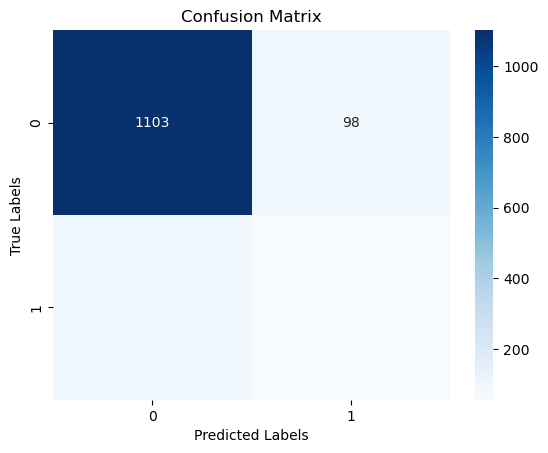

In [18]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test,gnb_tar_pred)

# visualize the confusion matrix with seaborn
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [19]:
# Evaluating the model
accuracy = accuracy_score(y_test,gnb_tar_pred)
report = classification_report(y_test,gnb_tar_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
# im

Accuracy: 0.8540899042004422
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1201
           1       0.36      0.36      0.36       156

    accuracy                           0.85      1357
   macro avg       0.64      0.64      0.64      1357
weighted avg       0.85      0.85      0.85      1357



In [20]:
#
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    


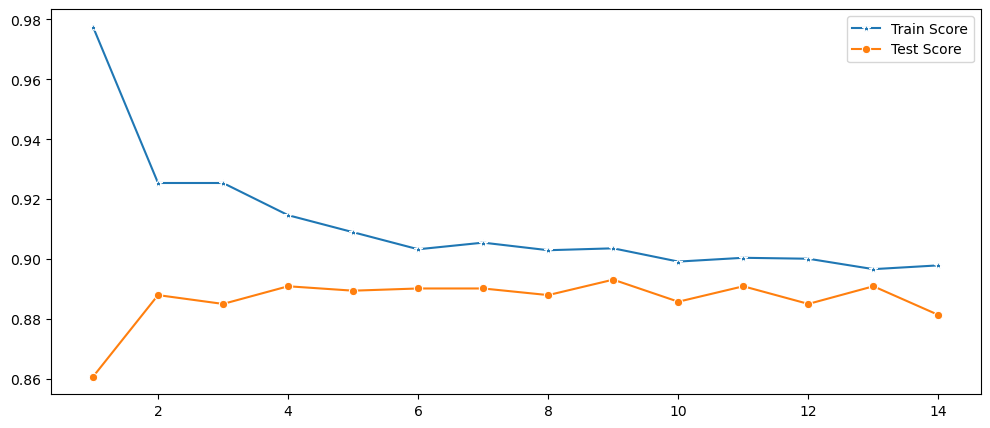

In [21]:
#
plt.figure(figsize=(12,5))
sns.lineplot(x=range(1,15),y=train_scores,marker='*',label='Train Score')
sns.lineplot(x=range(1,15),y=test_scores,marker='o',label='Test Score')
plt.show()

In [22]:
# best k is 13
knn = KNeighborsClassifier(13)
knn.fit(X_train,y_train)
knn_tar_pred = knn.predict(X_test)

Text(50.722222222222214, 0.5, 'True Labels')

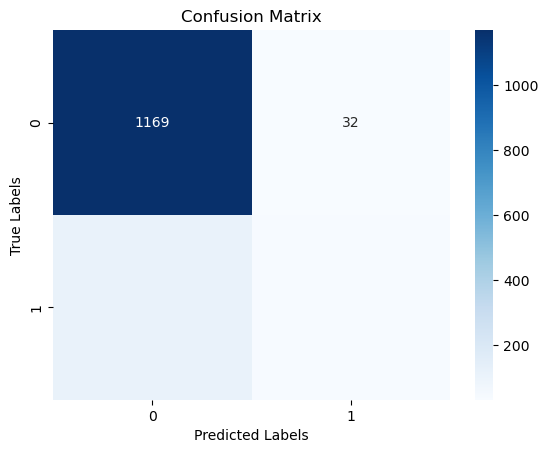

In [23]:
# Generate the confusion matrix
conf_matrix = confusion_matrix( y_test,knn_tar_pred)

# visualize the confusion matrix with seaborn
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [24]:
# Evaluating the model
accuracy = accuracy_score(y_test,knn_tar_pred)
report = classification_report( y_test,knn_tar_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8909358879882093
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1201
           1       0.56      0.26      0.35       156

    accuracy                           0.89      1357
   macro avg       0.73      0.61      0.65      1357
weighted avg       0.87      0.89      0.87      1357



In [25]:
#PART 2:

In [26]:
# Task 1: Baseline Model with MLPClassifier

In [27]:

# max_iter_range = [50, 100, 200, 300, 400, 500]  # Example iteration steps

# best_accuracy = 0
# best_configuration = 0

# # Try different numbers of neurons and iterations
# for max_iter in max_iter_range:
#     mlp = MLPClassifier(hidden_layer_sizes=(25,), max_iter=max_iter, random_state=42)
#     mlp.fit(X_train, y_train)
#     predictions = mlp.predict(X_test)
#     accuracy = accuracy_score(y_test, predictions)

#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_configuration =  max_iter

# print(f"Best Accuracy: {best_accuracy}")
# print(f"Best Configuration: {best_configuration} iterations")


In [28]:
mlp = MLPClassifier(
    hidden_layer_sizes=(25,),
    max_iter=200,
    alpha=0.1,
    activation='logistic',
    solver='adam')
X = X.values
y = y.values

In [29]:
# Task 7: prepare kfold cross validation
kfold = StratifiedKFold(10,random_state=42, shuffle=True)
# enumerate splits
scores = list()
predicted_targets = np.array([])
actual_targets = np.array([])
mlp_predict_proba= np.array([])
mlp_predict = np.array([])
X_test=np.array([])
for train_ix, test_ix in kfold.split(X, y):
    # split data
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    # fit the model
    mlp.fit(X_train, y_train)
    # predict test set
    mlp_predict = mlp.predict(X_test)
    mlp_predict_proba =  np.append(mlp_predict_proba,mlp.predict_proba(X_test)[:, 1])
    predicted_targets = np.append(predicted_targets, mlp_predict)
    actual_targets = np.append(actual_targets, y_test)
      # evaluate on train
    score_train = mlp.score(X_train, y_train)
    print('>%.3f' % score_train)
    scores.append(score_train)   
    # evaluate on predictions
    score_test = accuracy_score(y_test, mlp_predict)
    print('score_test: %.3f' % score_test)
    X_test.shape
    scores.append(score_test)

# summarize all scores
print('MLP Accuracy: {:.2f}%'.format(accuracy_score(actual_targets, predicted_targets) * 100))
print('Mean Testing set Accuracy: %.3f (%.3f)' % (mean(score_test), std(score_test)))
print('Mean Train set Accuracy: %.3f (%.3f)' % (mean(score_train), std(score_train)))

>0.890
score_test: 0.870
>0.886
score_test: 0.889
>0.893
score_test: 0.894
>0.890
score_test: 0.894
>0.886
score_test: 0.885
>0.889
score_test: 0.885
>0.886
score_test: 0.885
>0.891
score_test: 0.878
>0.888
score_test: 0.881
>0.890
score_test: 0.881
MLP Accuracy: 88.41%
Mean Testing set Accuracy: 0.881 (0.000)
Mean Train set Accuracy: 0.890 (0.000)


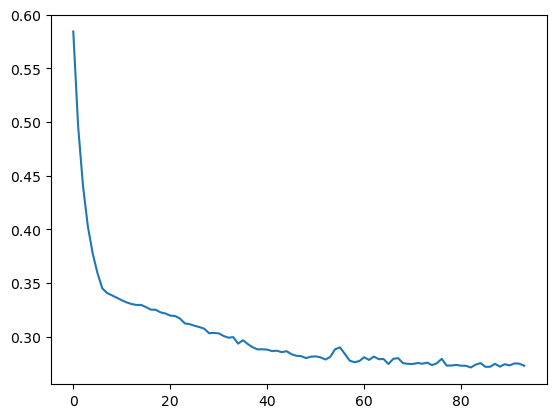

In [30]:
# Task 4.3: Adjust the Configuration 
loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.show()

Text(50.722222222222214, 0.5, 'True Labels')

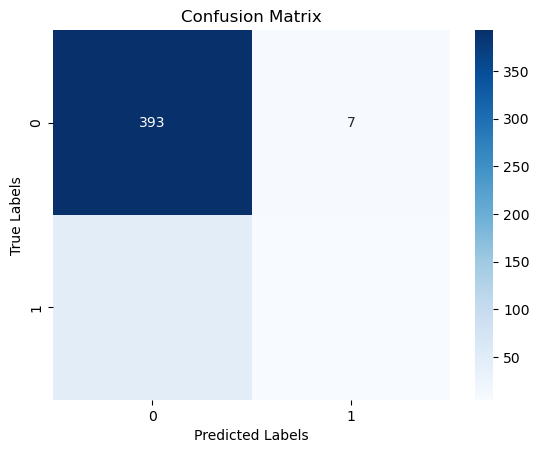

In [31]:
# Generate the confusion matrix
conf_matrix = confusion_matrix( y_test, mlp_predict)

# visualize the confusion matrix with seaborn
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [32]:
# Evaluating the model
accuracy = accuracy_score(y_test,mlp_predict)
report = classification_report(y_test, mlp_predict)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8805309734513275
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       400
           1       0.42      0.10      0.16        52

    accuracy                           0.88       452
   macro avg       0.65      0.54      0.55       452
weighted avg       0.84      0.88      0.85       452



In [33]:

# Total number of neurons k in the hidden layers
k = 25

# DataFrame to store the results
results_df = pd.DataFrame(columns=['Neuron Split (L1, L2)', 'Accuracy'])

# Iterate over different splits of neurons between the two layers
for i in range(1, k):
    neurons_layer1 = k - i
    neurons_layer2 = i

    # Define the MLP classifier with the current configuration of hidden layers
    clf = MLPClassifier(hidden_layer_sizes=(neurons_layer1, neurons_layer2),
                        random_state=42)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append the results
    results_df = results_df.append({
        'Neuron Split (L1, L2)': f'{neurons_layer1}, {neurons_layer2}',
        'Accuracy': accuracy
    }, ignore_index=True)

# Display the results table
print(results_df)


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['Neuron Split (L1, L2)'], results_df['Accuracy'], marker='o', linestyle='-')
plt.title('Classification Accuracy by Neuron Distribution')
plt.xlabel('Neuron Distribution (Layer1-Layer2)')
plt.ylabel('Classification Accuracy')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


In [ ]:
#### the model gives the best accuracy when neuron on layer 1 is 4 and layer 2 is 21
best_mlp = MLPClassifier(
    hidden_layer_sizes=(4,21))

# Train the classifier
best_mlp.fit(X_train, y_train)

    # Predict on the test set
best_mlp_predict = best_mlp.predict(X_test)


In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix( y_test, best_mlp_predict)

# visualize the confusion matrix with seaborn
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test,best_mlp_predict)
report = classification_report(y_test, best_mlp_predict)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)